- Import the pandas library as pd.
- Use read_csv() to load vt_tax_data_2016.csv and assign it to the variable data.
- View the first few lines of the dataframe with the head() method. This code has been written for you.

In [1]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv("vt_tax_data_2016.csv")

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

- Import pandas with the alias pd.
- Load vt_tax_data_2016.tsv, making sure to set the correct delimiter with the sep keyword argument.

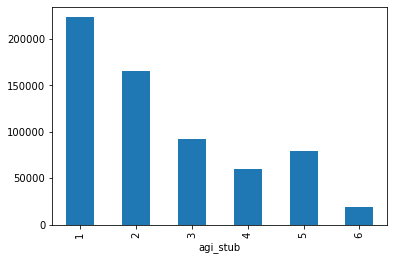

In [4]:
# Import pandas with the alias pd
import pandas as pd
import matplotlib.pyplot as plt

# Load TSV using the sep keyword argument to set delimiter
# data = pd.read_csv("vt_tax_data_2016.tsv", sep = "\t")

# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

- Create a list of columns to use: zipcode, agi_stub (income group), mars1 (number of single households), MARS2 (number of households filing as married), and NUMDEP (number of dependents).
- Create a dataframe from vt_tax_data_2016.csv that uses only the selected columns.

In [8]:
# Create list of columns to use
cols = ['zipcode', 'agi_stub' , 'mars1' , 'MARS2' , 'NUMDEP']

# Create dataframe from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols = cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


- Use nrows and skiprows to make a dataframe, vt_data_next500, with the next 500 rows.
- Set the header argument so that pandas knows there is no header row.
- Name the columns in vt_data_next500 by supplying a list of vt_data_first500's columns to the names argument.

In [10]:
vt_data_first500 = data
# Create dataframe of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows = 500,
                       		  skiprows = 500,
                       		  header = None,
                       		  names = vt_data_first500.columns)


# View the Vermont dataframes to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   zipcode  agi_stub  mars1  MARS2  NUMDEP
0        0         1  85090  14170   26200
1        0         2  51960  18820   32310
2        0         3  19540  22650   23610
3        0         4   5830  22190   18860
4        0         5   3900  33800   30330
                                                                                                                                                                                                                                                                                                                                                                                                                                                   zipcode  \
50 VT 5356 2 180 120 40 0 90 250 30 0 0 0 0 0 40 40 6223  180 6409  150 4710 40 16 30 102 30 68  0  0  30 353 40 120 50 492  0  0    0 40 107 40 173 30 286  60 186 0 0 0 0 30 103 30 119 40 45 0 0 0 0 40 657  1596  50 330 50 62  0 0 60 223 0 0 40 229  40 260 0 0 0 0 0 0 0 0 50 45  30 181 0 0 170 

- Load vt_tax_data_2016.csv with no arguments and view the dataframe's dtypes attribute. Note the data types of zipcode and agi_stub.

In [11]:
# Load csv with no additional arguments
data = pd.read_csv("vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


- Create a dictionary, data_types, specifying that agi_stub is "category" data and zipcode is string data.
- Reload the CSV with the dtype argument and the dictionary to set the correct column data types.
- View the dataframe's dtypes attribute.

In [15]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {"agi_stub" : "category",
			  "zipcode" : str}

# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype = data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


- Create a dictionary, null_values, specifying that 0s in the zipcode column should be considered NA values.
- Load vt_tax_data_2016.csv, using the na_values argument and the dictionary to make sure invalid ZIP codes are treated as missing.

In [16]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {"zipcode" : 0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values = null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

- Try to import the file vt_tax_data_2016_corrupt.csv without any keyword arguments.

In [18]:
# try:
#   # Import the CSV without any keyword arguments
#   data = pd.read_csv("vt_tax_data_2016_corrupt.csv")
  
#   # View first 5 records
#   print(data.head())
  
# except pd.errors.ParserError:
#     print("Your data contained rows that could not be parsed.")

- Import vt_tax_data_2016_corrupt.csv with the error_bad_lines parameter set to skip bad records.

In [19]:
# try:
#   # Import CSV with error_bad_lines set to skip bad records
#   data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
#                      error_bad_lines = False,
#                      warn_bad_lines=False)
  
#   # View first 5 records
#   print(data.head())
  
# except pd.errors.ParserError:
#     print("Your data contained rows that could not be parsed.")

- Update the import with the warn_bad_lines parameter set to issue a warning whenever a bad record is skipped.

In [20]:
# try:
#   # Set warn_bad_lines to issue warnings about bad records
#   data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
#                      error_bad_lines=False, 
#                      warn_bad_lines=True)
  
#   # View first 5 records
#   print(data.head())
  
# except pd.errors.ParserError:
#     print("Your data contained rows that could not be parsed.")